In [1]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [9]:
import zipfile

# Define the path for the uploaded zip file and the extraction directory
zip_file_path = '/content/archive-2.zip'
extraction_dir = '/content/extracted_images'

# Create a directory to extract the images if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Check the contents of the extracted directory
extracted_files = os.listdir(extraction_dir)
extracted_files[:5]  # Display the first 5 file names for verificati

['archive-2', '__MACOSX']

In [10]:
# Let's explore the contents of the 'archive-2' directory to understand its structure.
archive_dir = os.path.join(extraction_dir, 'archive-2')
archive_contents = os.listdir(archive_dir)
archive_contents[:5]  # Display the first 5 file names in the 'archive-2' directory

['knight-resize',
 'Rook-resize',
 'pawn_resized',
 'bishop_resized',
 'Queen-Resized']

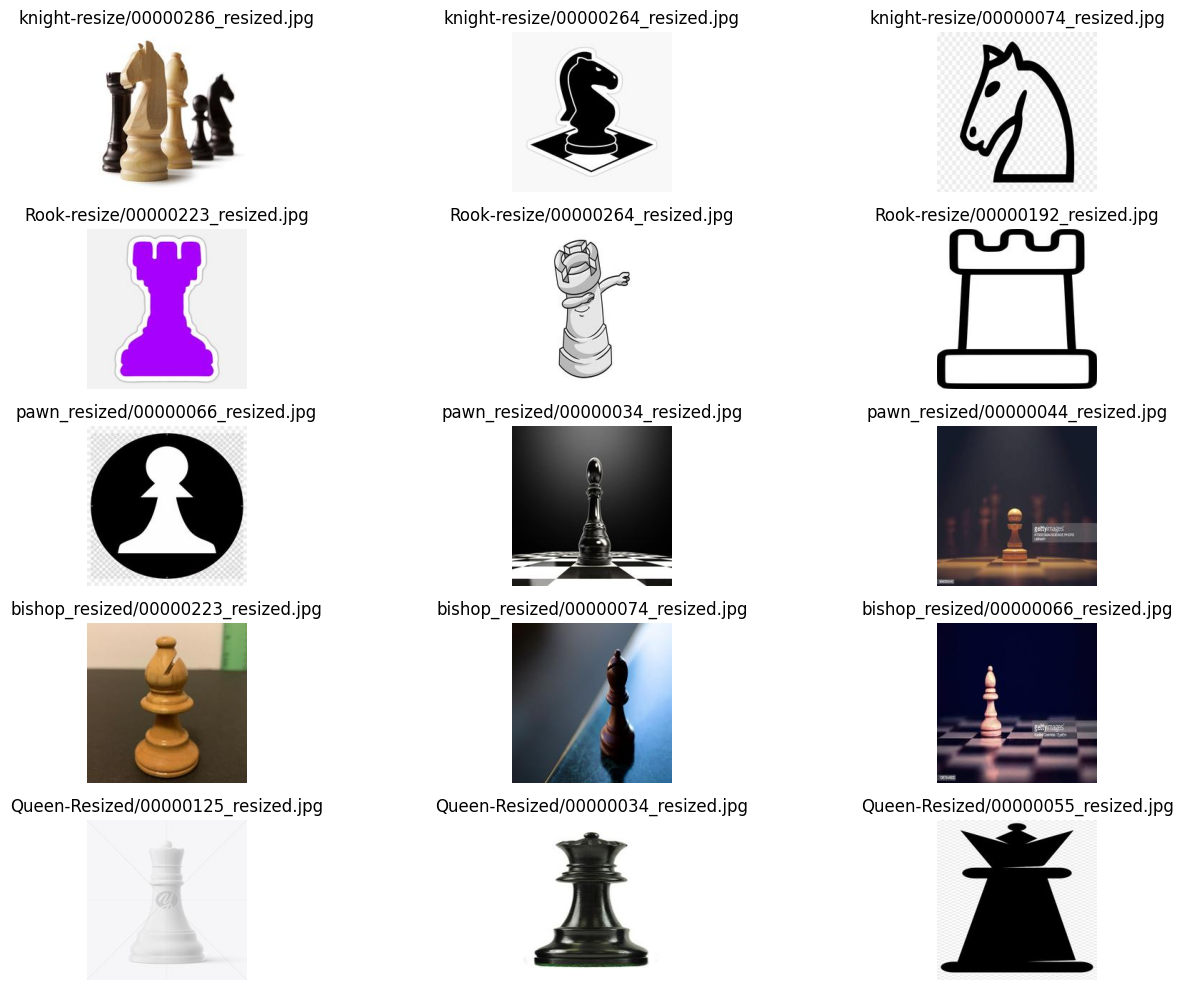

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_images_from_directory(directory, sample_size=3):
    """
    Load a few images from the specified directory.
    :param directory: Directory to load images from.
    :param sample_size: Number of images to load.
    :return: List of image arrays and their file names.
    """
    images = []
    file_names = []
    for file_name in os.listdir(directory)[:sample_size]:
        file_path = os.path.join(directory, file_name)
        try:
            image = Image.open(file_path)
            images.append(np.array(image))
            file_names.append(file_name)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    return images, file_names

# Load a few images from each directory and display them
fig, axs = plt.subplots(len(archive_contents), 3, figsize=(15, 10))

for i, dir_name in enumerate(archive_contents):
    dir_path = os.path.join(archive_dir, dir_name)
    images, file_names = load_images_from_directory(dir_path)
    for j in range(len(images)):
        axs[i, j].imshow(images[j])
        axs[i, j].set_title(f"{dir_name}/{file_names[j]}")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


In [13]:
# After extraction, the images should be in the extraction_dir
image_directory = extraction_dir  # This is the directory containing your images

In [14]:
# Function to preprocess images
def preprocess_images(directory, target_size=(128, 128)):
    preprocessed_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                image = Image.open(file_path)
                image_resized = resize(np.array(image), target_size, anti_aliasing=True, mode='reflect')
                if image_resized.shape[-1] == 3:
                    image_resized = np.mean(image_resized, axis=2)
                preprocessed_images.append(image_resized)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
    return np.array(preprocessed_images)


In [19]:
# Hypothetical function to extract embeddings using ImageBind-LLM
def extract_imagebind_llm_embeddings(image):
    # Replace this with the actual ImageBind-LLM model
    # Return a placeholder for the purpose of this example
    return np.random.rand(1024)

# Extract embeddings for all images
embeddings = [extract_imagebind_llm_embeddings(image) for image in preprocessed_images]


In [20]:
# Perform clustering with K-Means
embeddings_array = np.array(embeddings)
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(embeddings_array)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


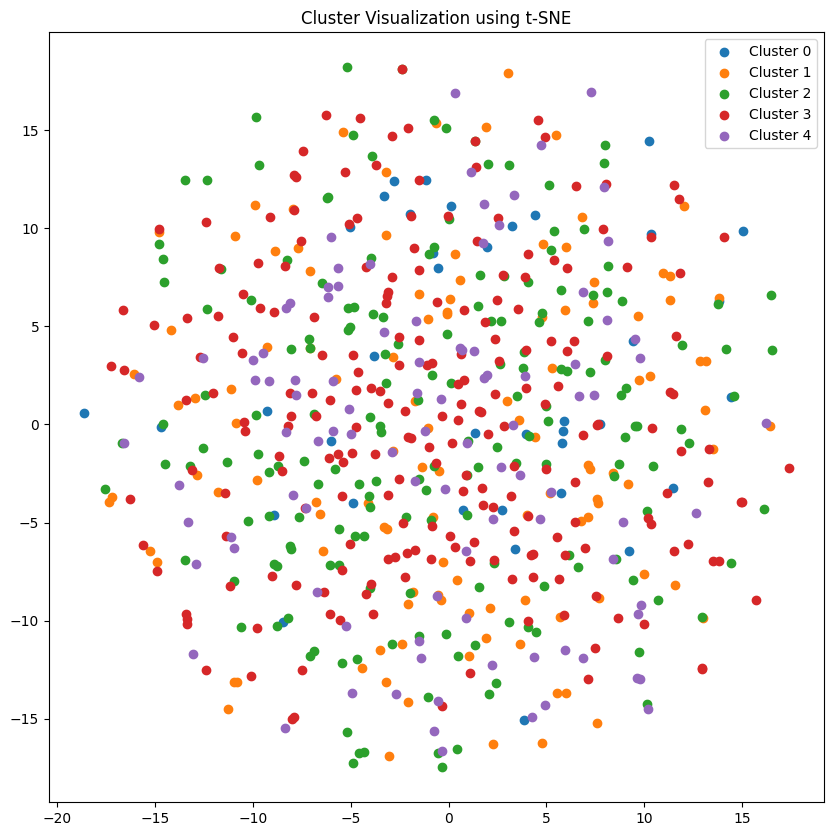

In [21]:
# Dimensionality reduction for visualization
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plotting the clusters
plt.figure(figsize=(10, 10))
for i in range(kmeans.n_clusters):
    cluster_indices = clusters == i
    plt.scatter(reduced_embeddings[cluster_indices, 0], reduced_embeddings[cluster_indices, 1], label=f'Cluster {i}')
plt.legend()
plt.title('Cluster Visualization using t-SNE')
plt.show()